# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name:

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [67]:
# Import Modules
import requests
import matplotlib.mlab as mlab
import pickle
import spacy
import numpy as np
from bs4 import BeautifulSoup, SoupStrainer
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import style

# List declarative elements
parser = 'html.parser'
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# Aquire Data
article_page = requests.get('https://www.growabonsaitree.com/species/wisteria-bonsai/')
article_html = article_page.text

with open('wisteria.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

soup = BeautifulSoup(article_html, parser)

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [68]:
with open('wisteria.pkl', 'rb') as f:
    article_html = pickle.load(f)

article_element = soup.find('article')
article_text = article_element.get_text()
doc = nlp(article_text.lower())

soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')

p_score = round(doc._.blob.polarity, 3)

print(f'The Polarity Score for the Wistera-Bonsai artcile is: {p_score}')

The Polarity Score for the Wistera-Bonsai artcile is: 0.205


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [69]:
def token_isolation(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if token_isolation(token)]
word_freq = Counter(map(str,interesting_tokens))
print(f'Most common words and their frequencies: \n{word_freq.most_common(5)}')

Most common words and their frequencies: 
[('bonsai', 15), ('tree', 14), ('wisteria', 12), ('growth', 6), ('sun', 5)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [70]:
interesting_lemmas = [token.lemma_ for token in doc if token_isolation(token)]
lemma_freq = Counter(interesting_lemmas)
print(f"Most common lemma's and their frequencies: \n{lemma_freq.most_common(5)}")

Most common lemma's and their frequencies: 
[('tree', 17), ('bonsai', 15), ('wisteria', 12), ('grow', 6), ('growth', 6)]


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

0.5517241379310345 0.6923076923076923 0.6428571428571429 0.36363636363636365 0.5185185185185185 0.35 0.5 0.631578947368421 0.4166666666666667 0.375 0.6666666666666666 0.8461538461538461 0.45454545454545453 0.47058823529411764 0.4444444444444444 0.47368421052631576 0.45454545454545453 0.5294117647058824 0.4666666666666667 0.5238095238095238 0.4444444444444444 0.4117647058823529 0.47058823529411764 0.8333333333333334 

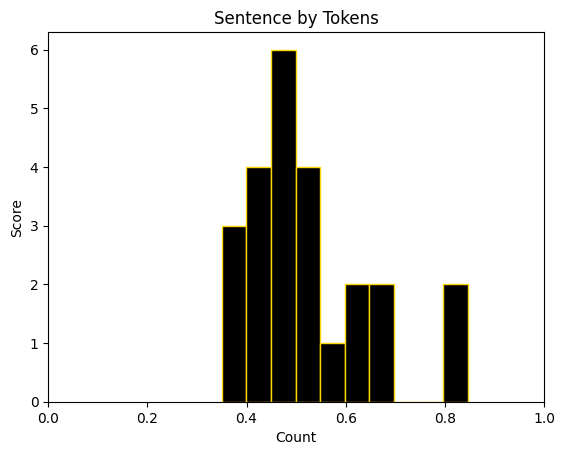

In [71]:
# Define per sentence variable
sentences = list(doc.sents)
#print(sentences)

# Define token score by sentence
def score_sentence_by_token(sentence, interesting_tokens):
    # Word Count
    count = 0
    for token in sentence:
        if not (token.is_space or token.is_punct):
            count += 1
    
    # Word occurrence count
    occurrence =  len([i for i in interesting_tokens if i in sentence ])
    
    # Calculation
    result = occurrence / count
    return result, count, occurrence

# Generate token per sentence score
tok_score_list = []
for sentence in sentences:
    tok_score_list.append(score_sentence_by_token(sentence, interesting_tokens)[0])
x_toc = tok_score_list

# Print list (horiztonally)
for item in tok_score_list:
    print(item, end=' ')

# Histogram
plt.title("Sentence by Tokens")
plt.xlabel("Count")
plt.ylabel("Score")
plt.xlim(0, 1)
#plt.ylim(,)
plt.hist(x_toc, edgecolor = 'gold', facecolor = 'black')
plt.show()

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

0.5517241379310345 0.6923076923076923 0.6428571428571429 0.36363636363636365 0.5185185185185185 0.35 0.5 0.631578947368421 0.4166666666666667 0.375 0.6666666666666666 0.8461538461538461 0.45454545454545453 0.47058823529411764 0.4444444444444444 0.47368421052631576 0.45454545454545453 0.5294117647058824 0.4666666666666667 0.5238095238095238 0.4444444444444444 0.4117647058823529 0.47058823529411764 0.8333333333333334 

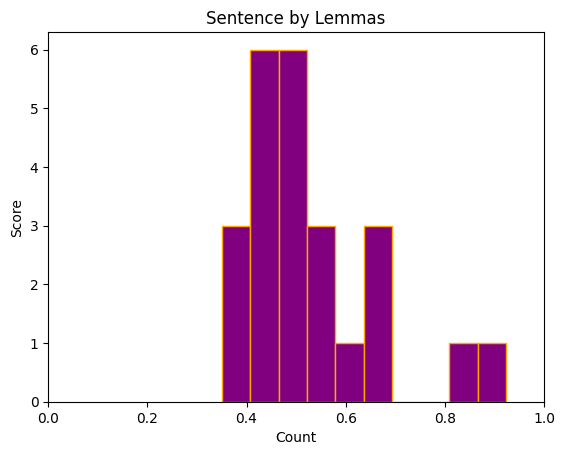

In [72]:
# Define llema score by sentence
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Word Count
    count = 0
    for token in sentence:
        if not (token.is_space or token.is_punct):
            count += 1
    
    # Word occurrence count
    lemcount = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_lemmas:
            lemcount += 1
    
    # Calculation
    result = lemcount / count
    return result, count, lemcount


# Lemma per Sentence 
sentence = sentences[0]
lem_score_list = []
for sentence in sentences:
    lem_score_list.append(score_sentence_by_lemma(sentence, interesting_lemmas)[0])
x_lem = lem_score_list

# Print list (horiztonally)
for item in tok_score_list:
    print(item, end=' ')

# Histogram
plt.title("Sentence by Lemmas")
plt.xlabel("Count")
plt.ylabel("Score")
plt.xlim(0, 1)
#plt.ylim(,)
plt.hist(x_lem, edgecolor = 'orange', facecolor = 'purple')
plt.show()

In [73]:
print(f'Lemma: {len(x_lem)} Token: {len(x_toc)}')

Lemma: 24 Token: 24


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.5
* Cutoff Score (lemmas): 0.6

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [92]:
sentences = list(doc.sents)
sentence_list = []

for sentence in sentences:
    if score_sentence_by_token(sentence, interesting_tokens)[0] > 0.5:
        sentence_list.append(sentence)

#print(sentence_list)

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?